In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import helper

import torch
from torch import optim
from torch import nn

MNIST dataset consists of greyscale handwritten digits. Each image is 28x28 pixels

In [ ]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

### Neural Network Architecture

A network with 784 input units, 1st hidden layer with 128 units and a ReLU activation, 2nd hidden layer with 64 units and a ReLU activation, and finally an output layer with 10 units and a softmax activation.

In [3]:
########## Initializing Model, Loss & Optimizer ##########
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterian = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for i in range(epochs):                             #Each epoch trains NN with 938 batches of 64 images, labels
    running_loss = 0
    for images,labels in trainloader:               #Loading batch of 64 images(Shape 64,1,28,28), labels in each iteration
        images = images.view(len(images),-1)        #Reshaping batch of 64 images into single vector (64,784) or (64,28*28)
        optimizer.zero_grad()                       #Clear the gradients, else gradients are accumulated
        out = model(images)                         #Forward pass
        loss = criterian(out, labels)               #Calculating loss
        loss.backward()                             #Calculating gradient
        optimizer.step()                            #Back Propogation - updating weights
        
        running_loss += loss.item()                 #Appending Loss
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9052803813775718
Training loss: 0.8919942909275799
Training loss: 0.5383820263212169
Training loss: 0.43141039467251885
Training loss: 0.38291111776728365


With the network trained, we can check out it's predictions.

In [4]:
def prob_display():
    images, labels = next(iter(trainloader))

    img = images[0].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    helper.view_classify(img.view(1, 28, 28), ps)

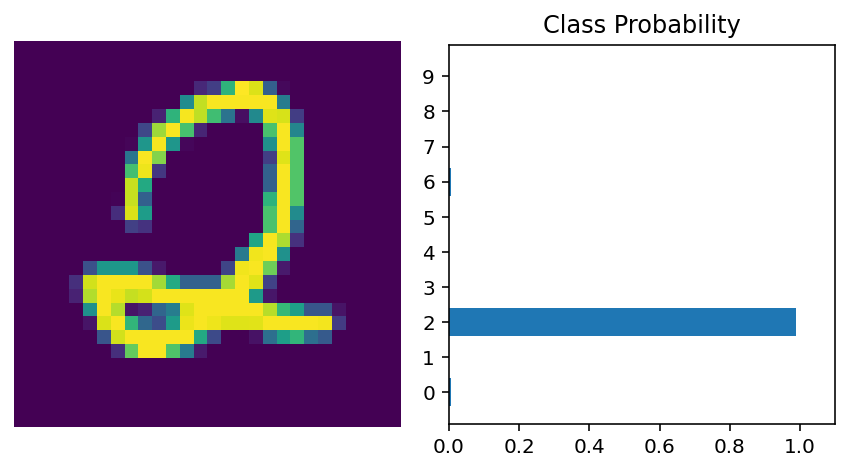

In [5]:
prob_display()

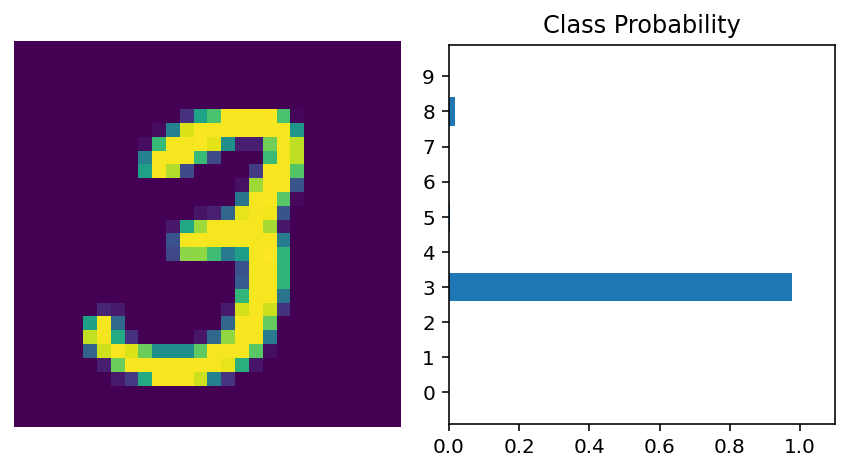

In [6]:
prob_display()

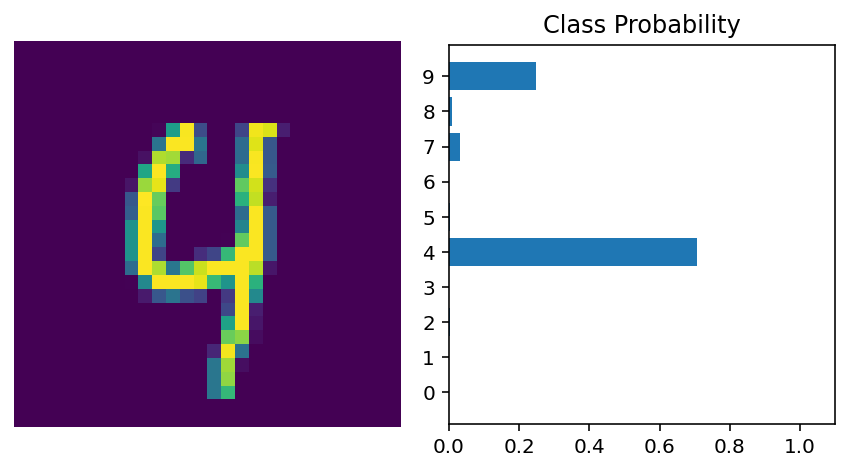

In [7]:
prob_display()

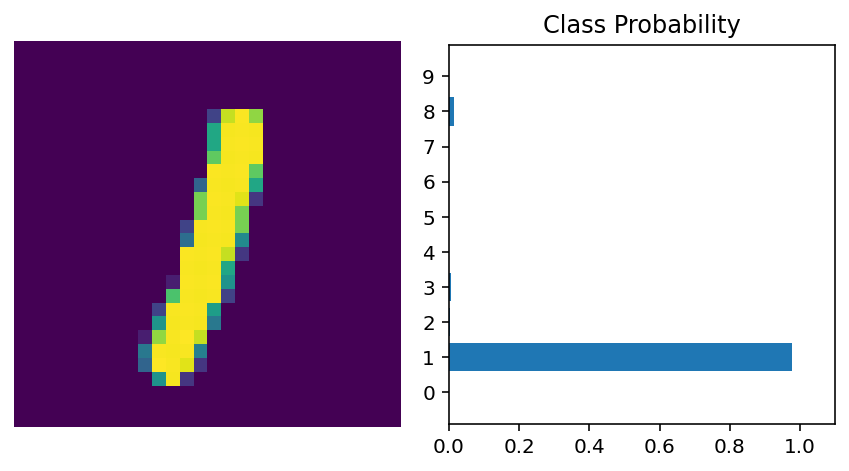

In [8]:
prob_display()